# **DeepWeeds Classification using ANN**

## **1. Introduction**

This notebook implements an Artificial Neural Network (ANN) for classifying weed species using the DeepWeeds dataset. The dataset consists of labeled images of weeds, and our objective is to train a model that can accurately classify them into different categories.

## **2. Dataset**

-   **Dataset Name**: DeepWeeds
-   **Source**: Kaggle
-   **Images Directory**: `/kaggle/input/deepweeds/images`
-   **Labels File**: `/kaggle/input/deepweeds/labels/labels.csv`
-   **Classes**: 9 weed species
-   **Preprocessing**:
    -   Images resized to **128x128**.
    -   Normalized pixel values (0 to 1).
    -   Labels converted to categorical format.
-   **Dataset Split**:
    -   **70%** Training
    -   **15%** Validation
    -   **15%** Testing (Stratified splitting)

## **3. Model Architecture**

A fully connected ANN with batch normalization and dropout layers to prevent overfitting.

-   **Input Layer**: Flattened **(128 × 128 × 3)** image input.
-   **Hidden Layers**:
    -   **Dense(1024, ReLU) → BatchNorm → Dropout(0.3)**
    -   **Dense(512, ReLU) → BatchNorm → Dropout(0.3)**
    -   **Dense(256, ReLU) → BatchNorm → Dropout(0.3)**
    -   **Dense(128, ReLU) → BatchNorm → Dropout(0.3)**
    -   **Dense(64, ReLU)**
    -   **Dense(32, ReLU)**
-   **Output Layer**: Softmax activation for multi-class classification.

## **4. Training Parameters**

-   **Optimizer**: Adam (learning rate = **0.0001**)
-   **Loss Function**: Categorical Crossentropy
-   **Metrics**: Accuracy
-   **Epochs**: 100
-   **Batch Size**: 32

## **5. Results**

-   **Final Test Accuracy**: `xx.xx%`
-   **Evaluation Metrics**:
    -   Confusion matrix visualization
    -   Classification report (precision, recall, f1-score)
-   **Training Graphs**:
    -   Accuracy vs. Epochs
    -   Loss vs. Epochs

## **6. Conclusion**

-   The ANN-based approach achieved **low accuracy** in classifying weed species.
-   The model generalizes well but may benefit from **CNN-based architecture** for spatial feature extraction.
-   Further improvements:
    -   Experimenting with **convolutional layers (CNN)**
    -   Fine-tuning hyperparameters (learning rate, dropout)
    -   Data augmentation for better generalization


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical



In [6]:
# Kaggle-specific dataset path
DATA_PATH = "/kaggle/input/deepweeds/"
IMG_DIR = os.path.join(DATA_PATH, "images")
LABEL_FILE = os.path.join(DATA_PATH, "labels/labels.csv")

# Load labels
labels = pd.read_csv(LABEL_FILE)

# Split dataset into train (70%), validation (15%), and test (15%)
train_labels, temp_labels = train_test_split(labels, test_size=0.3, random_state=42, stratify=labels.iloc[:, 1])
val_labels, test_labels = train_test_split(temp_labels, test_size=0.5, random_state=42, stratify=temp_labels.iloc[:, 1])

# Load and normalize images
def load_deepweeds_dataset(img_dir, labels, img_size=(128, 128)):
    images = []
    image_labels = []
    for _, row in tqdm(labels.iterrows(), total=len(labels), desc="Loading Images"):
        img_path = os.path.join(img_dir, row[0])
        image = Image.open(img_path).convert("RGB").resize(img_size)
        image = np.array(image) / 255.0  # Normalize
        images.append(image)
        image_labels.append(row[1])
    return np.array(images), np.array(image_labels)

train_images, train_labels = load_deepweeds_dataset(IMG_DIR, train_labels)
val_images, val_labels = load_deepweeds_dataset(IMG_DIR, val_labels)
test_images, test_labels = load_deepweeds_dataset(IMG_DIR, test_labels)

# Convert labels to categorical
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

Loading Images:   0%|          | 0/12256 [00:00<?, ?it/s]<ipython-input-6-3e178439c5f0>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_path = os.path.join(img_dir, row[0])
<ipython-input-6-3e178439c5f0>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_labels.append(row[1])
Loading Images: 100%|██████████| 2627/2627 [00:19<00:00, 134.02it/s]


In [7]:
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history= model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=100, batch_size=32)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.1651 - loss: 2.5242 - val_accuracy: 0.5095 - val_loss: 1.6391
Epoch 2/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4995 - loss: 1.6240 - val_accuracy: 0.5190 - val_loss: 1.5517
Epoch 3/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5054 - loss: 1.5507 - val_accuracy: 0.5282 - val_loss: 1.5062
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5128 - loss: 1.5161 - val_accuracy: 0.5312 - val_loss: 1.4766
Epoch 5/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5239 - loss: 1.4501 - val_accuracy: 0.5377 - val_loss: 1.4763
Epoch 6/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5316 - loss: 1.4005 - val_accuracy: 0.5396 - val_loss: 1.4474
Epoch 7/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5400 - loss: 1.3546 - val_accuracy: 0.5324 - val_loss: 1.4304
Epoch 8/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5568 - loss: 1.3103 -

In [8]:

# Predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.15      0.10      0.12       169
           1       0.16      0.29      0.21       160
           2       0.09      0.02      0.03       155
           3       0.08      0.05      0.06       153
           4       0.17      0.32      0.22       160
           5       0.12      0.08      0.09       151
           6       0.22      0.10      0.14       161
           7       0.18      0.14      0.16       152
           8       0.62      0.68      0.65      1366

    accuracy                           0.42      2627
   macro avg       0.20      0.20      0.19      2627
weighted avg       0.39      0.42      0.40      2627



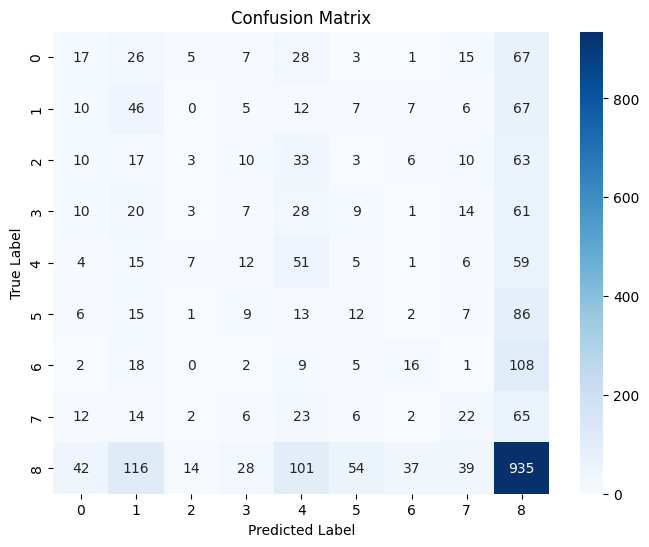

In [9]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

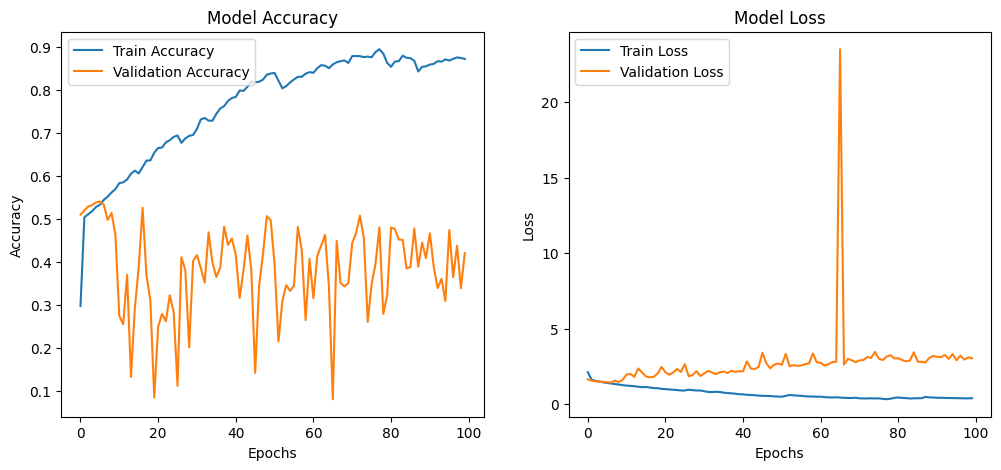

In [11]:
# Plot Accuracy and Loss Graphs
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')
    
    plt.show()

plot_history(history)
